# Enter Student Name & ID

In [1]:
student_id = 99101581  #@param {type:"integer"}
student_name = "Daniyal Rasti" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99101581
your name: Daniyal Rasti


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [1]:
import numpy as np

In [2]:
class my_PCA:
    def __init__(self, num_components):
        self.num_components = num_components
        self.mean = None
        self.eigenvalues = None
        self.eigenvectors = None
        self.eigenvector_subset = None

    def fit(self, X):
        # Step 1: Standardize the Data
        self.mean = np.mean(X, axis=0)
        X_meaned = X - self.mean
        
        # Step 2: Compute the Covariance Matrix
        cov_matrix = np.cov(X_meaned, rowvar=False)
        
        # Step 3: Compute the Eigenvalues and Eigenvectors
        self.eigenvalues, self.eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Step 4: Sort the Eigenvalues and Eigenvectors
        sorted_index = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[sorted_index]
        self.eigenvectors = self.eigenvectors[:, sorted_index]
        
        # Step 5: Select a subset of the Eigenvectors (num_components)
        self.eigenvector_subset = self.eigenvectors[:, 0:self.num_components]
        
        # Step 6: Transform the data
        X_reduced = np.dot(self.eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
        
        return X_reduced

    def transform(self, new_data):
        # Standardize the new data using the mean from the training set
        new_data_meaned = new_data - self.mean
        
        # Transform the new data using the selected eigenvectors
        new_data_reduced = np.dot(self.eigenvector_subset.transpose(), new_data_meaned.transpose()).transpose()
        
        return new_data_reduced

    def inverse_transform(self, reduced_data):
        # Reconstruct the data to the original dimensions
        reconstructed_data = np.dot(reduced_data, self.eigenvector_subset.transpose()) + self.mean
        return reconstructed_data


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

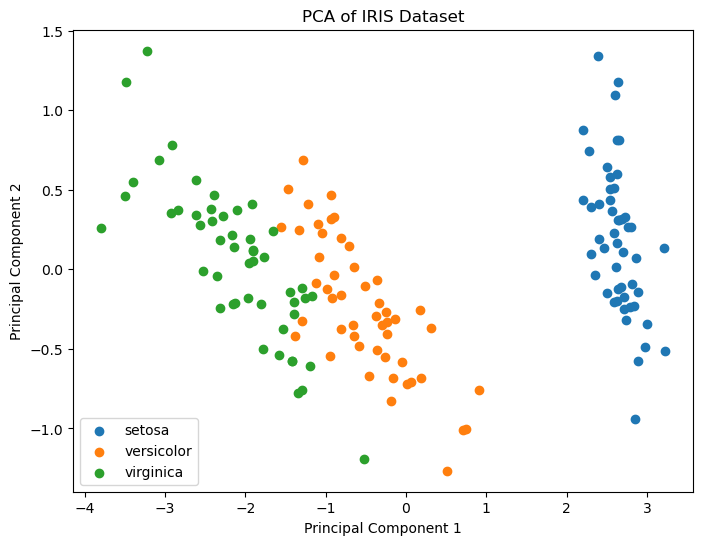

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA to reduce to 2D
iris_pca = my_PCA(2)
X_reduced = iris_pca.fit(X)


# Plot the results
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    subset = X_reduced[y == target]
    plt.scatter(subset[:, 0], subset[:, 1], label=iris.target_names[target])

plt.title('PCA of IRIS Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: ` 


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [4]:
#loading images

import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

def load_images_from_folder(folder):
    images = []
    labels = []
    for i in range(1, 41):  # There are 40 folders (s1 to s40)
        for j in range(1, 11):  # Each folder contains 10 images (1.bmp to 10.bmp)
            img_path = os.path.join(folder, f's{i}', f'{j}.bmp')
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img.flatten())
                labels.append(i-1)  # Label is the folder number - 1
    return np.array(images), np.array(labels)


data_folder = "ORL"
X, y = load_images_from_folder(data_folder)


In [9]:
# organizing dataset

# Split into train and test sets
X_train, X_test = [], []
y_train, y_test = [], []

for i in range(40):  # 40 individuals
    X_train.extend(X[i*10:i*10+5])  # First 5 images for training
    X_test.extend(X[i*10+5:i*10+10])  # Last 5 images for testing
    y_train.extend(y[i*10:i*10+5])
    y_test.extend(y[i*10+5:i*10+10])


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



In [73]:
# Perform PCA and reduce dimensionality
num_components = 40 # You can choose between 40 and 50
train_pca = my_PCA(num_components)
reduced_train = train_pca.fit(X_train)
reduced_test = train_pca.transform(X_test)


X_train shape: (200, 2304)
X_test shape: (200, 2304)
X_train_pca shape: (200, 40)
X_test_pca shape: (200, 40)
y_train shape: (200,)
y_test shape: (200,)


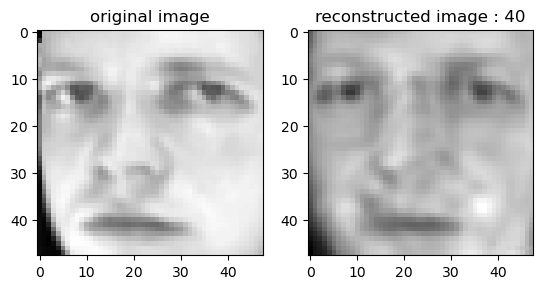

In [76]:
# performing pca reduction and then recnstructing a sample image
img = X_test[0]
img_reduced = train_pca.transform(img.reshape(1,-1))
img_reconstructed = train_pca.inverse_transform(img_reduced)
plt.subplot(1,2,1)
plt.imshow(img.reshape(48,48), cmap='gray')
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(img_reconstructed.reshape(48,48), cmap='gray')
plt.title(f'reconstructed image : {num_components}')
plt.show()

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Train the LDA classifier
lda = LDA()
lda.fit(reduced_train, y_train)


# Predict on the test data
y_pred = lda.predict(reduced_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of LDA classifier on PCA-transformed data: {accuracy * 100:.2f}%")




Accuracy of LDA classifier on PCA-transformed data: 94.00%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


<span style="color: green;">
ANSWER : for low values of dimentions, accuracy decreases because data loss in PCA is higher. in other words, num of dimentions are too low to capter image details. and therefore discremination of images decrese.

therefor, increasing dimensions from 5 to 20, imroves accuracy significantly, but after some point, there is not much change in accuracy.
the rasone is: by increasing dimension, lda model gets more complecated and change of overfitting increases. thats why performace does not increase any further.
</span>

num of components : 5  Accuracy: 59.00%
num of components : 10  Accuracy: 77.50%
num of components : 15  Accuracy: 89.00%
num of components : 20  Accuracy: 90.50%
num of components : 25  Accuracy: 91.00%
num of components : 30  Accuracy: 94.00%
num of components : 35  Accuracy: 91.00%
num of components : 40  Accuracy: 94.00%
num of components : 45  Accuracy: 92.50%
num of components : 50  Accuracy: 92.00%
num of components : 55  Accuracy: 91.50%
num of components : 60  Accuracy: 90.50%
num of components : 65  Accuracy: 91.00%
num of components : 70  Accuracy: 91.50%
num of components : 75  Accuracy: 93.00%
num of components : 80  Accuracy: 92.00%
num of components : 85  Accuracy: 92.00%
num of components : 90  Accuracy: 92.00%
num of components : 95  Accuracy: 92.50%


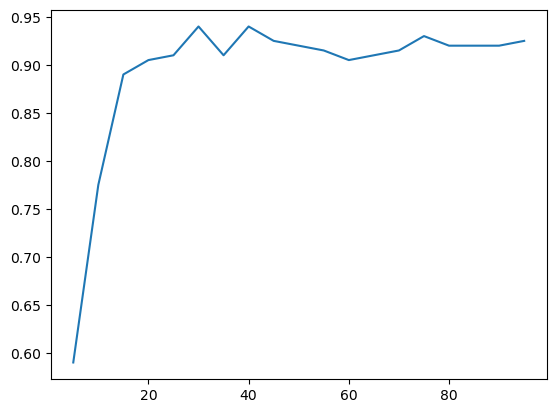

In [82]:
dimensions = np.arange(5,100,5)
accuracy_array = np.zeros(len(dimensions))
cnt = 0
for dim in dimensions:
    num_components = dim 
    train_pca = my_PCA(num_components)
    reduced_train = train_pca.fit(X_train)
    reduced_test = train_pca.transform(X_test)
    lda = LDA()
    lda.fit(reduced_train, y_train)
    y_pred = lda.predict(reduced_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"num of components : {num_components}  Accuracy: {accuracy * 100:.2f}%")
    accuracy_array[cnt] =accuracy
    cnt +=1

plt.plot(dimensions, accuracy_array)
plt.show()